In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Importing the data used in the analysis

In [31]:
data_path='medical_examination.csv'
df=pd.read_csv(data_path)
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Creating the overweight column

In [32]:
#df['overweight']=((df['weight']/(df['height']/100)**2) >25).replace({True: 1, False: 0})
df['overweight']=((df['weight']/(df['height']/100)**2) >25)*1

#### Normalizing the data by making 0 always good and 1 always bad

In [33]:
df['cholesterol']=(df['cholesterol']>1)*1
df['gluc']= (df['gluc']>1)*1

#### Grouping and Plotting cholesterol, gluc, smoke, alco, active and overweight variables by cardio levels

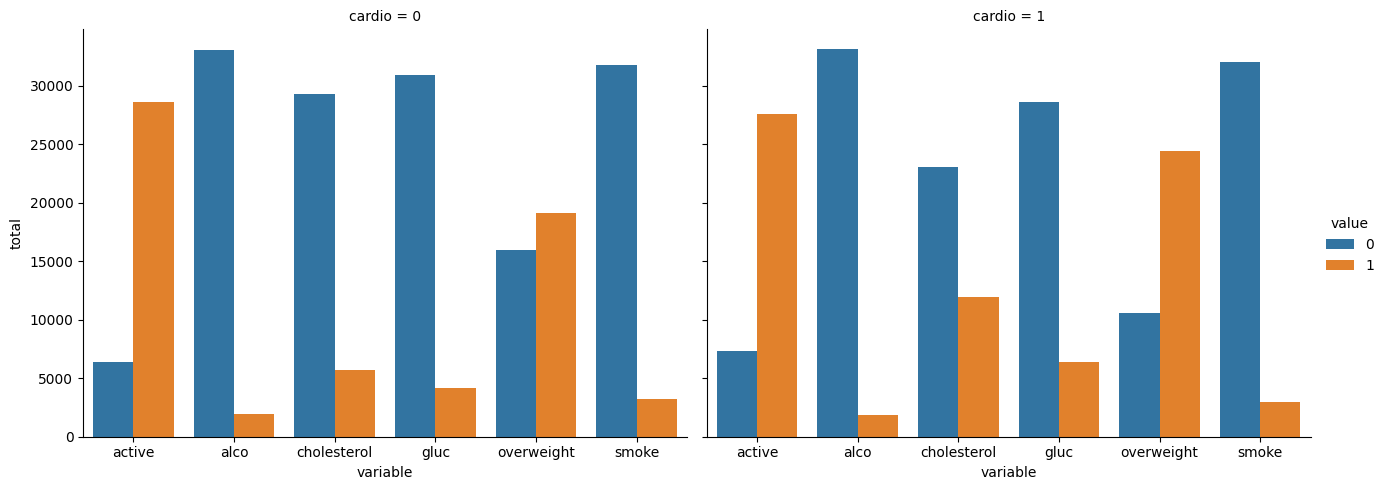

In [34]:
var_to_plot=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
df_cat = pd.melt(df,id_vars='cardio',value_vars=var_to_plot)
df_cat['total']=1
df_cat = df_cat.groupby(['cardio', 'variable', 'value'],as_index=False).count()
chart=sns.catplot(data=df_cat,x='variable',y='total',hue='value',kind='bar',col='cardio',aspect=8/6)
fig = chart.fig
fig.savefig('catplot.png')

#### Data Cleaning: Keep only the records of patients with heights, weights between the 2.5th and 97.5th percentiles and with diastolic pressure less than systolic.

In [35]:
height_filter=((df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)))
weight_filter=((df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975)))
diastolic_systolic=(df['ap_lo'] <= df['ap_hi'])
df_heat=df.loc[height_filter & weight_filter & diastolic_systolic]
df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


#### Calculate the correlation matrix

In [36]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


#### Generate a mask for the upper triangle

In [37]:
mask = np.triu(np.ones_like(corr, dtype=bool))

#### Plot the correlation matrix using seaborn

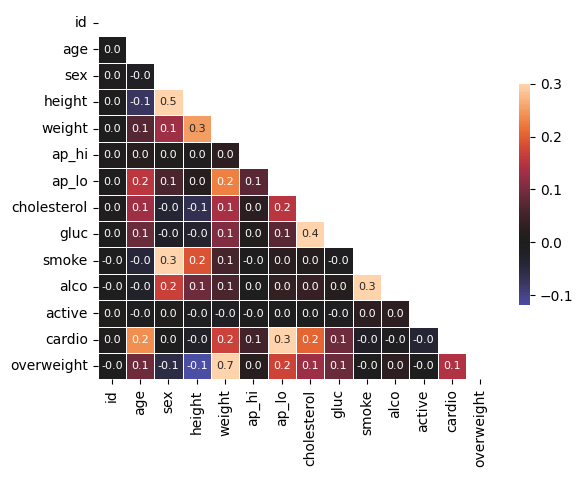

In [38]:
fig, ax = plt.subplots()
sns.heatmap(data=corr, vmin = -0.12, vmax = 0.3, center=0, annot=True, annot_kws={'size':8}, cbar_kws={"shrink": 0.6},
             fmt=".1f", linewidths=0.5, mask=mask)
fig.savefig('heatmap.png')
